Q2. Consider a 2-dimensional classification problem where the data vectors stem from two equiprobable classes, ω1 and ω2. The classes are modelled by Gaussian distributions with means m1 = [0,0] T, m2 = [1,2] T, and respective covariance matrices 

>$S1 = S2 = \begin{bmatrix}
0.8 &  0.2 \\
0.2 &  0.8 \\
\end{bmatrix}$
 
Generate two data sets X1 and X2 consisting of 1000 and 5000 points, respectively. Taking X1 as the training set, classify the points in X2 using the squared Euclidean distance-based classifier. Compute the classification error. 

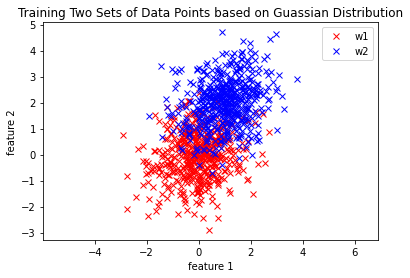


Estimated Means of the two classes: 
[[-0.05385355 -0.02331424]
 [ 0.991028    2.0121364 ]]

No. of Misclassifications:  619

Misclassification Error:  0.12380000000000002


In [5]:
"""
2-dimensional classification problem using squared euclidean distance

@author: Ajay Biswas
220CS2184
M.Tech Information Security 
National Institute of Technology, Rourkela

"""

import statistics as st
import numpy as np
import pandas as pd
import sys
MAX = sys.maxsize

def MER_Error(X,Y):
  correct_count = 0
  for i in range(len(X)):
    if(X[i] == Y[i]):
      correct_count = correct_count + 1
  MER_val = 1 - (correct_count/len(X))
  return MER_val

def misclassifications(X,Y):
  correct_count = 0
  for i in range(len(X)):
    if(X[i] == Y[i]):
      correct_count = correct_count + 1
  return len(X) - correct_count

def euclidean_distance(p1,p2):
  distance = pow(sum([(a - b) ** 2 for a, b in zip(p1, p2)]),0.5)
  return distance 

def squared_euclidean_distance(p1,p2): 
  distance = sum([(a - b) ** 2 for a, b in zip(p1, p2)])
  return distance 
 

def select_distance(p1,p2,distance_type):
# returns the calculated distance based on the type of distance provided    
    if(distance_type == "euclidean"):
        return euclidean_distance(p1,p2)
    elif(distance_type == "squared_euclidean"):
        return squared_euclidean_distance(p1,p2)
    else:
        return None

def distance_based_classifier(X,y,d_type,tp):
# X is a 2D matrix with two columns as features and rows as instances
# y is the true class labels
# d_type is the type of distance taken for classifying
# tp is the fraction of training dataset, the fractional testing dataset will be (1-tp)


    # Placing two features in two separate 2D arrays Species_x and Species_y
    # the rows of this 2D array determines each separate class
    cols = 1
    rows = 0
    for i in range(0,len(y)):
        if(y[i]!=rows):
            cols = 0
            rows = rows + 1
        cols = cols + 1;        
    rows = rows+1;
    
    Species_x = np.zeros((rows, cols))
    Species_y = np.zeros((rows, cols))
    
    cnt = 0
    for i in range(rows):
        for j in range(cols):
           Species_x[i][j] = X[cnt,0]
           Species_y[i][j] = X[cnt,1] 
           cnt = cnt + 1
           
    # rows = no. of classes
    # cols = no. of instances in each class
    
    ########################## Training Phase ########################## 
    
    # invalid training dataset size
    if(tp >= 1 or tp <= 0):
        return None
    
    percent = tp*100
          
    # Slicing from beginning
    train_range_s = 0
    train_range_e = int((cols/100)*percent)  
    
    all_centroid = np.zeros((rows, 2))
    
    # Taking mean of all points of each class and finding their centroid
    for k in range(rows):
        CL_x = Species_x[k][train_range_s:train_range_e]
        CL_mean_x = st.mean(CL_x)
        
        CL_y = Species_y[k][train_range_s:train_range_e]
        CL_mean_y = st.mean(CL_y)
        
        # (x,y) coordinates of centroid, column 0 - x, 1 - y
        all_centroid[k,0] = CL_mean_x;
        all_centroid[k,1] = CL_mean_y;

    print('\nEstimated Means of the two classes: ')    
    print(all_centroid)
    
    
    ########################## Testing Phase ########################## 
    
    # Since we don't need class names now, we can simply merge all instances together
    
    # Slicing after the last training instance
    test_range_s = int((cols/100)*percent)  
    test_range_e = cols  
    
    C_x = np.zeros((rows, test_range_e - test_range_s))
    C_y = np.zeros((rows, test_range_e - test_range_s))
    for k in range(rows):
        C_x[k][:] = Species_x[k][test_range_s:test_range_e]
        C_y[k][:] = Species_y[k][test_range_s:test_range_e]       
    # Flattenning numpy array
    C_x = C_x.flatten()
    C_y = C_y.flatten()
    
    # predicted labels
    predicted = [0]*len(C_x);
    
    # actual labels
    # initially we keep labels in different rows w.r.t classes
    # later we will flatten the array
    actual = np.zeros((rows, test_range_e - test_range_s))
    beg = test_range_s
    end = cols
    for k in range(rows):
        actual[k][:] = y[beg:end]
        beg = beg + cols
        end = end + cols
    # flatten the array
    actual = actual.flatten()    
    
    # classifying points by measuring its distance from centroid of each class

    distances_predicted = [0]*len(C_x)

    min_dist = MAX
    for i in range (len(C_x)):
        for j in range(0,rows):
            
            distance = select_distance([all_centroid[j,0],all_centroid[j,1]],[C_x[i],C_y[i]],d_type)
            
            # invalid distance
            if(distance == None):
                return None
            
            # finding the minimum distance  
            if(min_dist > distance):
                min_dist = distance
                distances_predicted[i] = distance 
                lbl = j;
        
        # store predicted label
        predicted[i] = lbl;
        #reset min_dist
        min_dist = MAX

    # Calculating actual distances
    distances_actual = [0]*len(C_x);
    for i in range (len(C_x)):
      distances_actual[i] = select_distance([all_centroid[int(actual[i]),0],all_centroid[int(actual[i]),1]],[C_x[i],C_y[i]],d_type)
              
    # Accuracy Calculations
    mer_error = MER_Error(actual,predicted)
    misclassification = misclassifications(actual,predicted)
    return [predicted, mer_error, misclassification]


def main():

    # 3000 w1 3000 w2
    # Training phase 
    # 0-499 w1, 3000-3499 w2
    # Testing Phase
    # 500-2999 w1, 3500-5999 w2
    
    # the x and y co-ordinate is taken as two features
    
    import matplotlib.pyplot as plt
    
    # w1
    mean = [0,0]
    cov = [[0.8,0.2], [0.2, 0.8]] 
    a = np.random.multivariate_normal(mean, cov, 3000)
    f1 = a[:,0]
    f2 = a[:,1]
    
    # w2
    mean2 = [1,2]
    cov2 = [[0.8,0.2], [0.2, 0.8]] 
    a = np.random.multivariate_normal(mean2, cov2, 3000)
    f1_2 = a[:,0]
    f2_2 = a[:,1]
    
    X1 = [f1,f2]
    X2 = [f1_2,f2_2]
    
    X = np.concatenate((X1,X2),axis=1)
    X = np.transpose(X)     # feature matrix with 6000 rows and 2 columns
    
    y = np.concatenate(([0]*3000,[1]*3000)) # actual labels
    
    # plotting training data points of the two classes 
    plt.plot(X[0:500,0], X[0:500,1],'x',color='red')
    plt.plot(X[3000:3500,0], X[3000:3500,1],'x',color='blue')
    plt.axis('equal')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(['w1', 'w2'])
    plt.title('Training Two Sets of Data Points based on Guassian Distribution')
    plt.show() 

    # 16.67 % of 6000 is 1000. Training based on 1000 data points.   
    sq_euclidean = distance_based_classifier(X,y,"squared_euclidean",0.1667)
    
    y_dash = sq_euclidean[0]    # predicted labels

    error_rate = sq_euclidean[1] 
    misclassification = sq_euclidean[2]

    print('\nNo. of Misclassifications: ',misclassification)
    print('\nMisclassification Error: ',error_rate)
    
    
if __name__=="__main__": 
    main()